In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo

In [4]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [5]:
b = bioinfo.gen_df2(df['Species'][2],df['Sequence'][2],3)


In [6]:
from sklearn.manifold import TSNE
import numpy as np

feat_cols = b.loc[:, b.columns != 'Fragment'].columns

rndperm = np.random.permutation(b.shape[0])
n_sne = 7000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(b.loc[:, b.columns != 'Fragment'].loc[rndperm[:n_sne],b.loc[:, b.columns != 'Fragment'].columns].values)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 174 samples in 0.000s...
[t-SNE] Computed neighbors for 174 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 174 / 174
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.869919
[t-SNE] KL divergence after 300 iterations: 1.110005


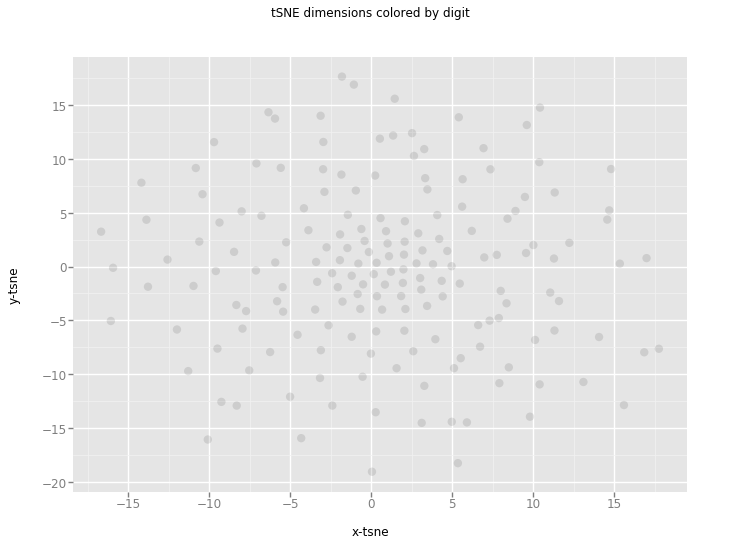

<ggplot: (-9223363244697381088)>

In [8]:
from ggplot import *

df_tsne = b.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart